In [2]:
def get_symbol():
    company_ticker = raw_input("enter the company ticker symbol: ")
    company_ticker = company_ticker.upper()
    return company_ticker

def get_data():
    
    #date and time of the trade
    date = company.get_trade_datetime()

    #opening price
    opening_price = company.get_open()

    #Price right now (Yahoo finance is delayed by 15 mins????)
    current_price = company.get_price()

    #Day's high and low prices 
    day_high = company.get_days_high()
    day_low = company.get_days_low()
    
    #price changes from opening price
    price_change = company.get_change()
    
    
    #200 days moving average
    th_moving_avg = company.get_200day_moving_avg()
    #50 days moving average
    fifty_moving_avg = company.get_50day_moving_avg()
    
    #volume
    volume = company.get_volume()
    #compare this days volume with average volume
    average_daily_volume = company.get_avg_daily_volume()

    #PE ratio
    PE = company.get_price_earnings_ratio()

    #PEG ratio ---> pe ratio divided by 1-reinvestment (growth)
    PEG = company.get_price_earnings_growth_ratio()
    
    #book value
    book_value = company.get_book_value()

    print "trading date: ", date
    print "\ncurrent price: $", current_price
    print "opening price: $" , opening_price
    print "\nday high: $", day_high
    print "day low: $", day_low
    print "\nprint price change: $", price_change
    print "\n200 days moving average: $", th_moving_avg
    print "50 days moving average: $", fifty_moving_avg
    print "\nToday's volume: ", volume
    print "Average volume: ", average_daily_volume
    print "\nPrice to earning (PE) ratio : ", PE
    print "Price earning to growth (PEG) ratio: ", PEG
    print "\nbook value",  book_value
    '''
    if you refresh after market closes, you will get error
    #Refresh to get a new price
    # Note that after the market closes @ 4PM EST, the price will stay the same
    company.refresh()

    date = company.get_trade_datetime()
    current_price = company.get_price()
    price_change = company.get_change()

    print "\n########## After refreshing ####################"
    print "trading date: ", date
    print "current price: ", current_price
    print "opening price: $" , opening_price
    print "print price change: $", price_change
    ''';

In [3]:
#to get all opening prices together
def get_historical_opening(historical):

    opening = [] #is a dynamic array (list) for python
    
    for i in range(len(historical)):
        x = historical[i]['Open']
        opening.append(x)
        
    return opening

def get_historical_high(historical):

    days_high = []

    for i in range(len(historical)):
        x = historical[i]['High']
        days_high.append(x)

    return days_high

def get_historical_low(historical):
    days_low = [] 

    for i in range(len(historical)):
        x = historical[i]['Low']
        days_low.append(x)

    return days_low

def get_historical_closing(historical):

    #same for closing    
    closing = [] 
    
    for i in range(len(historical)):
        x = historical[i]['Close']
        closing.append(x)
        
    return closing
def get_historical_volume(historical):
    historical_volume = [] #is a dynamic array (list) for python
    average_volume = []

    for i in range(len(historical)):
        x = historical[i]['Volume']
        historical_volume.append(x)
        average_volume.append(company.get_avg_daily_volume())
    return historical_volume, average_volume

In [4]:
from yahoo_finance import Share
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import company_name as cn
#import sklearn   
    
ticker = get_symbol()
company = Share(ticker)
get_data()

enter the company ticker symbol: goog
trading date:  2015-10-07 18:32:00 UTC+0000

current price: $ 639.48
opening price: $ 649.24

day high: $ 650.61
day low: $ 632.15

print price change: $ -5.96

200 days moving average: $ 576.03
50 days moving average: $ 621.85

Today's volume:  1541141
Average volume:  2600560

Price to earning (PE) ratio :  30.13
Price earning to growth (PEG) ratio:  1.23

book value 163.07


In [5]:
begin = raw_input("Enter begin day in 'yyyy-mm-dd' format: ")
end = raw_input("Enter ending day in 'yyyy-mm-dd' format: ")

historical = company.get_historical(begin, end)
print len(historical), "Days of historical data"

#reverse the list 
historical.reverse()

##-------------------------------------------------------------------------------##
 #--------- Get historical opening price, day's high, day's low, volume ---------#
    #------- For the selected sample size (number of trading days) -------------#
    # ----- Features : opening, high, low, volume -----------------------------#
    # ---------- Target : closing --------------------------------------------#



historical_opening = get_historical_opening(historical)
historical_closing = get_historical_closing(historical)
historical_high = get_historical_high(historical)
historical_low = get_historical_low(historical)
historical_volume, average_volume = get_historical_volume(historical)

Enter begin day in 'yyyy-mm-dd' format: 2015-01-01
Enter ending day in 'yyyy-mm-dd' format: 2015-10-06
192 Days of historical data


## Plots

Opening vs Closing

    blue - opening
    red - closing

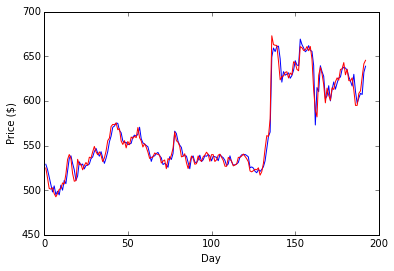

In [6]:
%matplotlib inline
x_axis = np.arange(0+1, len(historical)+1)

plt.plot(x_axis, historical_opening, 'b', x_axis, historical_closing, 'r')
plt.xlabel('Day')
plt.ylabel('Price ($)')
#plt.figure(figsize=(20,10))
plt.show();

#### Historical opening, closing, high, low

    - opening - yellow
    - closing - red
    - high - blue
    - low - green

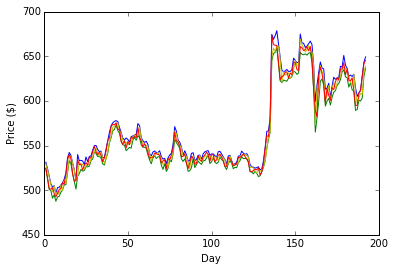

In [7]:
plt.plot(x_axis, historical_high, 'b', x_axis, historical_low, 'g', x_axis, historical_opening, 'y', x_axis, historical_closing, 'r')
plt.xlabel('Day')
plt.ylabel('Price ($)')
#plt.figure(figsize=(20,10))
plt.show();

#### Volume vs Average Volume

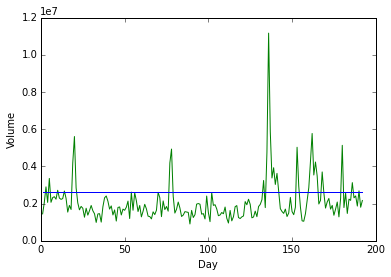

In [8]:
plt.plot(x_axis,historical_volume, 'g', x_axis, average_volume, 'b')
plt.xlabel('Day')
plt.ylabel('Volume')
plt.show()

Convert the data collected into numpy arrays

In [9]:
opening =  np.array(historical_opening)
volume = np.array(historical_volume)
high = np.array(historical_high)
low = np.array(historical_low)
avg_vol = np.array(average_volume)

closing = np.array(historical_closing)


- Stack the data

- Reshape (sample_size, #_of_features 

In [10]:
data = np.vstack((opening, high, low, volume, avg_vol))

shape1, shape2 = data.shape
data = data.reshape(shape2, shape1)

data.shape

(192, 5)

Need today's data for the features selected

In [11]:

opening_price = company.get_open()
todays_volume = company.get_volume()
high = company.get_days_high()
low = company.get_days_low()
avg_volume = average_volume[0]

print opening_price
print todays_volume
print high
print low
print avg_volume
#target_pre = np.asarray(closing)
#target = np.vstack(target_pre)

649.24
1541141
650.61
632.15
2600560


Collect today's data int a numpy array

In [12]:
today =np.array((opening_price, high, low, todays_volume, avg_volume))

# Scikit-learn
    - Import svm
    - fit
    - predict

In [13]:
from sklearn import svm

In [15]:
clf = svm.SVR()

#Fit takes in data (#_samples X #_of_features array), and target(closing - 1 X #_of_Sample_size array)
clf.fit(data,closing)

predict = clf.predict(today)


date = company.get_trade_datetime()
name = cn.find_name(ticker)
print name, "[" , ticker, "]"  #get company name using the ticker symbol
print "\nPredicted [closing] price for ", date[:10], ": $", predict[0]
company.refresh()

#change = (company.get_price() - company.get_open())/company.get_open()
#print change

print "current price $", company.get_price()
#print "% change today ", 

Google Inc. [ GOOG ]

Predicted [closing] price for  2015-10-07 : $ 542.164111638
current price $ 638.65




To do:
    - different implementations of svm
        - svr
        - NuSVR
        - LinearSVR (Only Linear Kernel
        
    - linear kernel vs non-linear kernels
        
    - parameters for fit()
    
    - Point system for getting it right vs wrong (additional training)
    
    - train the system at each iteration
        